In [ ]:
# IMPORTING MODULES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from math import *

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

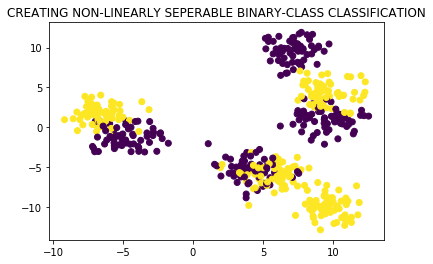

In [26]:
# CREATING BINARY-CLASS CLASSIFICATION DATASET { 2-FEATURES} AND { NON-LINAERLR -SEPERABLE}
from sklearn.datasets import make_blobs
plt.figure()
plt.title('CREATING NON-LINEARLY SEPERABLE BINARY-CLASS CLASSIFICATION')
x,y=make_blobs(n_samples=500,n_features=2,random_state=4,centers=8,cluster_std = 1.3)
y=y%2 # used to convert multi-class to binary-class
plt.scatter(x[:,0],x[:,1],c=y)
plt.show()

In [27]:
print(x.shape,y.shape,sep='\n')

(500, 2)
(500,)


In [28]:
# TRAIN AND TEST SPLIT DATASET
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2 ,random_state=0)


In [42]:
# TRAIN THE MODEL
svm=SVC(C=1,kernel='rbf')
svm.fit(x_train,y_train)
print(svm.score(x_test,y_test)*100)

89.0


In [30]:
# PREPARATION OF THE GRID
arr1=np.arange(x[:,0].min()-1,x[:,0].max()+1,0.01)
arr2=np.arange(x[:,1].min()-1,x[:,1].max()+1,0.01)
xx,yy=np.meshgrid(arr1,arr2)
print(xx.shape,yy.shape,sep='\n')
print(790*440)

(2677, 2375)
(2677, 2375)
347600


In [31]:
# CLASSIFYING EACH POINT ON THE GRID
input_array=np.array([xx.ravel(),yy.ravel()]).T
labels=svm.predict(input_array)


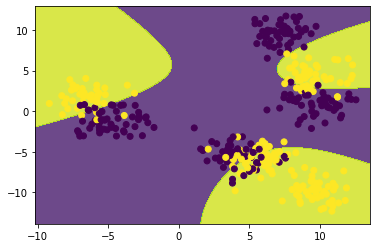

In [44]:
# PLOT THE OUTPUT DECISION BOUNDARY
plt.contourf(xx,yy,labels.reshape(xx.shape),alpha=0.8)
plt.scatter(x_train[:,0],x_train[:,1],c=y_train)